In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lifestyle-and-wellbeing-data/Wellbeing_and_lifestyle_data.csv


In [3]:
data=pd.read_csv('/kaggle/input/lifestyle-and-wellbeing-data/Wellbeing_and_lifestyle_data.csv')
data=data[data.DAILY_STRESS !='1/1/00']
data['DAILY_STRESS']=pd.to_numeric(data['DAILY_STRESS'])
data_young=data[data.AGE=='21 to 35']
data_fifty=data[data.AGE=='51 or more']
data_too_young=data[data.AGE== 'Less than 20']
data_thirty_fifty =data[data.AGE== '36 to 50']
data

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER
0,7/7/15,3,2,2,5,0,5,2,0,1,...,0,7,5,5,1,4,0,5,36 to 50,Female
1,7/7/15,2,3,4,3,8,10,5,2,2,...,5,8,2,2,2,3,2,6,36 to 50,Female
2,7/7/15,2,3,3,4,4,10,3,2,2,...,5,8,10,2,2,4,8,3,36 to 50,Female
3,7/7/15,3,3,10,3,10,7,2,5,2,...,0,5,7,5,1,5,2,0,51 or more,Female
4,7/7/15,5,1,3,3,10,4,2,4,2,...,0,7,0,0,2,8,1,5,51 or more,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12751,2/23/2020 22:03:56,3,4,10,8,10,8,6,5,1,...,3,7,0,1,1,10,6,7,21 to 35,Female
12752,2/24/2020 2:44:30,3,3,6,5,2,5,1,0,2,...,0,7,0,0,2,3,0,2,36 to 50,Female
12753,2/24/2020 10:35:02,4,4,7,5,3,3,4,2,1,...,5,6,0,2,2,6,3,5,36 to 50,Female
12754,2/24/2020 12:54:10,3,3,10,4,8,10,3,3,1,...,1,6,0,1,1,10,1,10,21 to 35,Female


 In a study about daily habits, 
Your Work-Life Balance survey evaluates how we thrive in both your professional and personal lives: it reflects how well you shape your lifestyle, habits and behaviors to maximize your overall life satisfaction along the following five dimensions:
1. Healthy body, reflecting your fitness and healthy habits;
2. Healthy mind, indicating how well you embrace positive emotions;
3. Expertise, measuring the ability to grow your expertise and achieve something unique;
4. Connection, assessing the strength of your social network and your inclination to discover the world;
5. Meaning, evaluating your compassion, generosity and how much 'you are living the life of your dream'.

# 21 to 35 dangerous zone

In [32]:
data_age=pd.get_dummies(data['AGE'])
data_age=pd.concat([data['DAILY_STRESS'],data_age],axis=1)
data_age=data_age.groupby('DAILY_STRESS').sum()
data_age.index.name='index'
data_age['DAILY_STRESS']=data_age.index

summ=data_age.sum(axis=0)

data_age1=data_age*100/summ

data_age1['DAILY_STRESS']=data_age.index
data_age1

,21 to 35,36 to 50,51 or more,Less than 20,DAILY_STRESS
index,,,,,
0,3.593303,3.519956,6.026786,6.213965,0
1,14.842793,13.386918,19.456845,16.912236,1
2,21.906901,21.563193,20.014881,19.795003,2
3,28.848510,28.021064,25.930060,26.521461,3
4,18.191098,19.484479,17.113095,17.040359,4
5,12.617395,14.024390,11.458333,13.516976,5


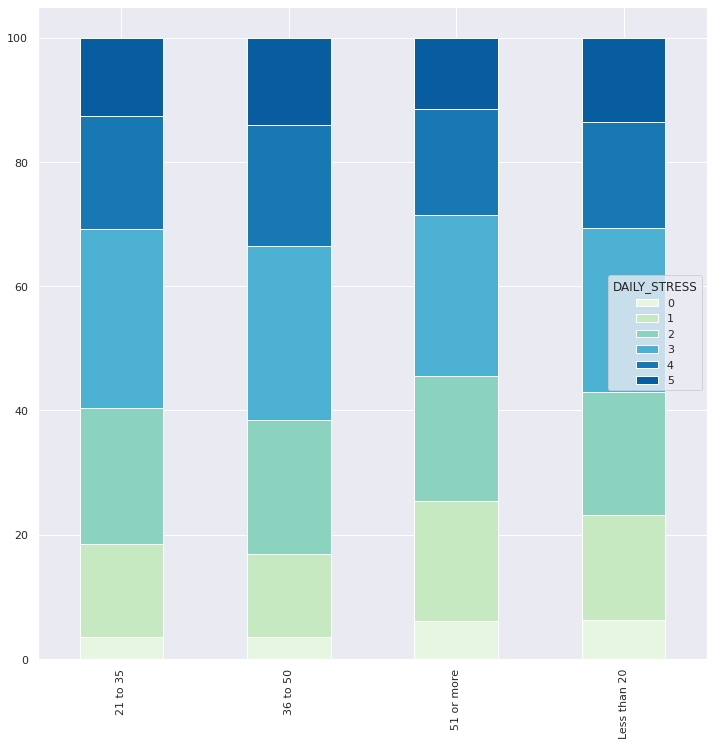

In [33]:
sns.set()
fig=data_age1.set_index('DAILY_STRESS').T.plot(kind='bar', stacked=True,colormap=ListedColormap(sns.color_palette("GnBu", 10)),figsize=(12,12))
sns.set_style("whitegrid", {'axes.grid' : False})
fig
#plt.savefig('output1.png', dpi=300, bbox_inches='tight')

In [6]:
data_age=pd.get_dummies(data['AGE'])

data_two=data.drop(['Timestamp','GENDER','AGE'],axis=1)

In [7]:
data_two=pd.DataFrame(data_two)

new=[]

for i,col in enumerate(data_two):
    col=str(col)
    #print(col)
    data_age_i=pd.concat([data_two[col],data_age],axis=1)
    data_age_i=data_age_i.groupby(col).sum()
    data_age_i.index.name=col
   
    summ=data_age_i.sum(axis=0)
    data_age1=data_age_i*100/summ
    new.append(data_age1)
    
    print(new)

FRUITS_VEGGIES
[                 21 to 35   36 to 50  51 or more  Less than 20
FRUITS_VEGGIES                                                
0                4.695794   2.688470    1.711310      5.637412
1               19.232340  12.915743    8.705357     18.577835
2               23.336056  21.951220   18.303571     24.151185
3               23.254390  24.002217   22.172619     22.485586
4               14.618212  16.158537   19.828869     14.029468
5               14.863209  22.283814   29.278274     15.118514]
DAILY_STRESS
[                 21 to 35   36 to 50  51 or more  Less than 20
FRUITS_VEGGIES                                                
0                4.695794   2.688470    1.711310      5.637412
1               19.232340  12.915743    8.705357     18.577835
2               23.336056  21.951220   18.303571     24.151185
3               23.254390  24.002217   22.172619     22.485586
4               14.618212  16.158537   19.828869     14.029468
5               14.86320

[                 21 to 35   36 to 50  51 or more  Less than 20
FRUITS_VEGGIES                                                
0                4.695794   2.688470    1.711310      5.637412
1               19.232340  12.915743    8.705357     18.577835
2               23.336056  21.951220   18.303571     24.151185
3               23.254390  24.002217   22.172619     22.485586
4               14.618212  16.158537   19.828869     14.029468
5               14.863209  22.283814   29.278274     15.118514,                21 to 35   36 to 50  51 or more  Less than 20
DAILY_STRESS                                                
0              3.593303   3.519956    6.026786      6.213965
1             14.842793  13.386918   19.456845     16.912236
2             21.906901  21.563193   20.014881     19.795003
3             28.848510  28.021064   25.930060     26.521461
4             18.191098  19.484479   17.113095     17.040359
5             12.617395  14.024390   11.458333     13.516976,      

[                 21 to 35   36 to 50  51 or more  Less than 20
FRUITS_VEGGIES                                                
0                4.695794   2.688470    1.711310      5.637412
1               19.232340  12.915743    8.705357     18.577835
2               23.336056  21.951220   18.303571     24.151185
3               23.254390  24.002217   22.172619     22.485586
4               14.618212  16.158537   19.828869     14.029468
5               14.863209  22.283814   29.278274     15.118514,                21 to 35   36 to 50  51 or more  Less than 20
DAILY_STRESS                                                
0              3.593303   3.519956    6.026786      6.213965
1             14.842793  13.386918   19.456845     16.912236
2             21.906901  21.563193   20.014881     19.795003
3             28.848510  28.021064   25.930060     26.521461
4             18.191098  19.484479   17.113095     17.040359
5             12.617395  14.024390   11.458333     13.516976,      

[                 21 to 35   36 to 50  51 or more  Less than 20
FRUITS_VEGGIES                                                
0                4.695794   2.688470    1.711310      5.637412
1               19.232340  12.915743    8.705357     18.577835
2               23.336056  21.951220   18.303571     24.151185
3               23.254390  24.002217   22.172619     22.485586
4               14.618212  16.158537   19.828869     14.029468
5               14.863209  22.283814   29.278274     15.118514,                21 to 35   36 to 50  51 or more  Less than 20
DAILY_STRESS                                                
0              3.593303   3.519956    6.026786      6.213965
1             14.842793  13.386918   19.456845     16.912236
2             21.906901  21.563193   20.014881     19.795003
3             28.848510  28.021064   25.930060     26.521461
4             18.191098  19.484479   17.113095     17.040359
5             12.617395  14.024390   11.458333     13.516976,      

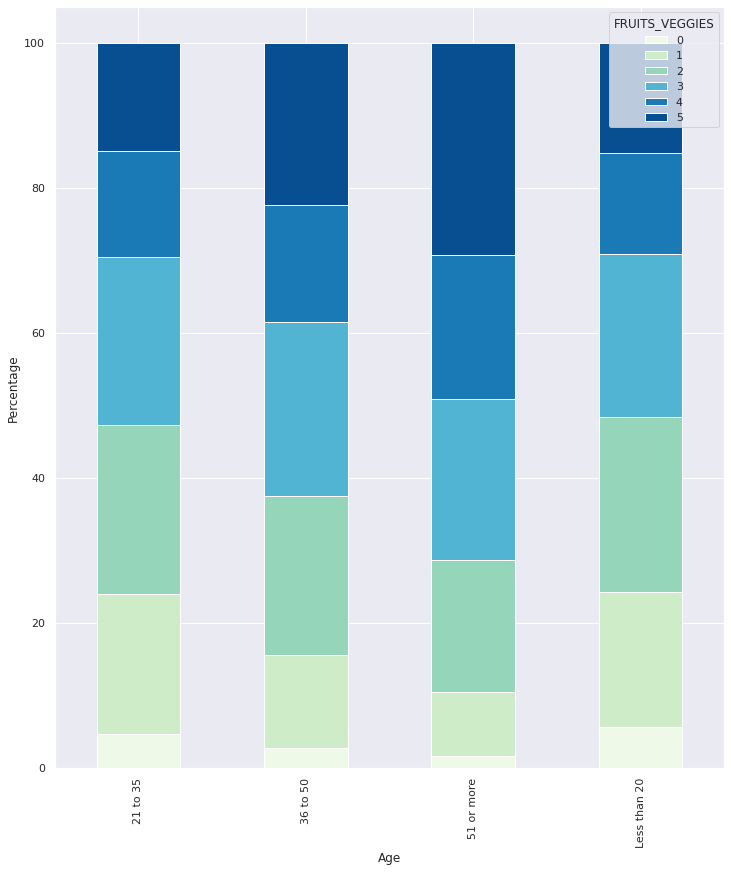

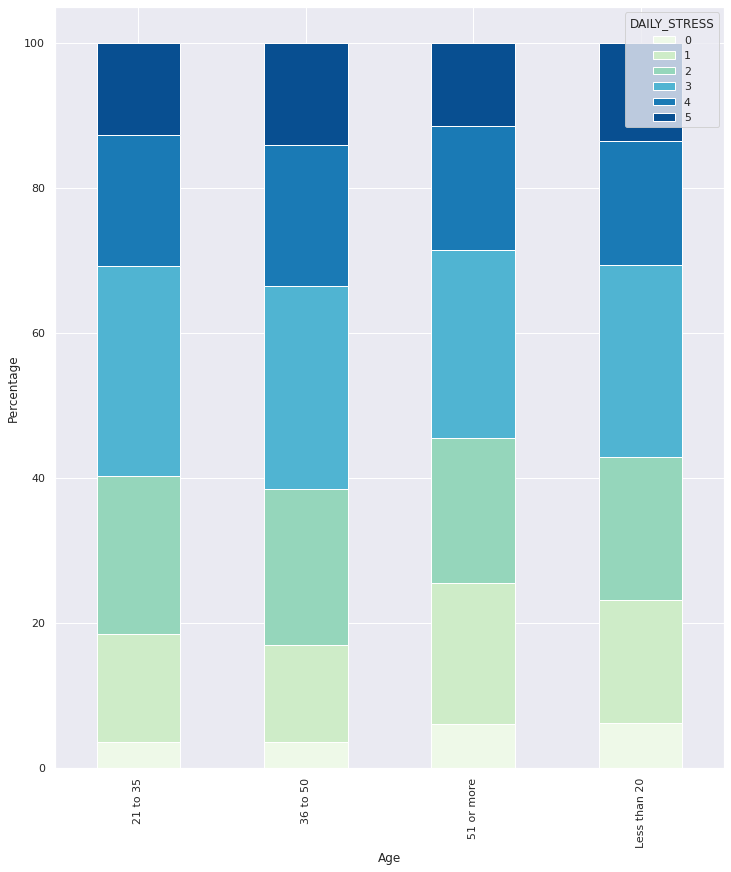

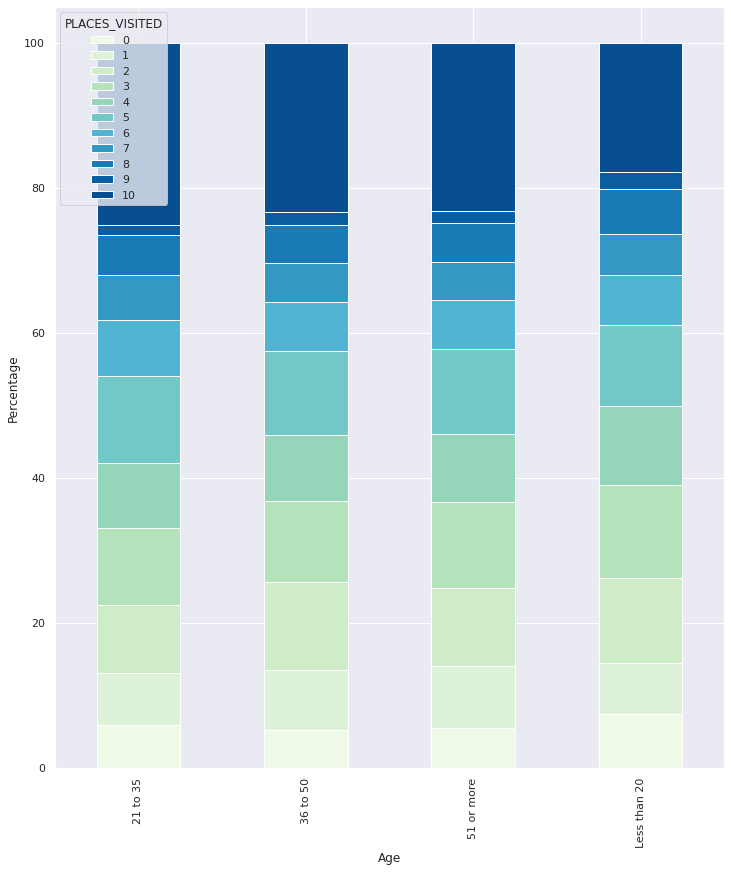

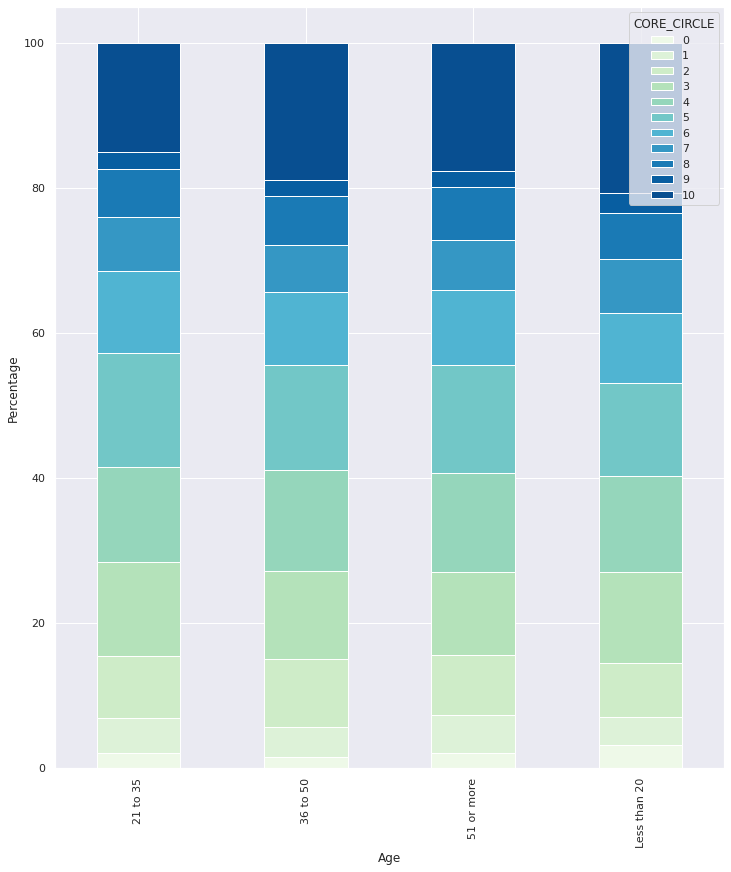

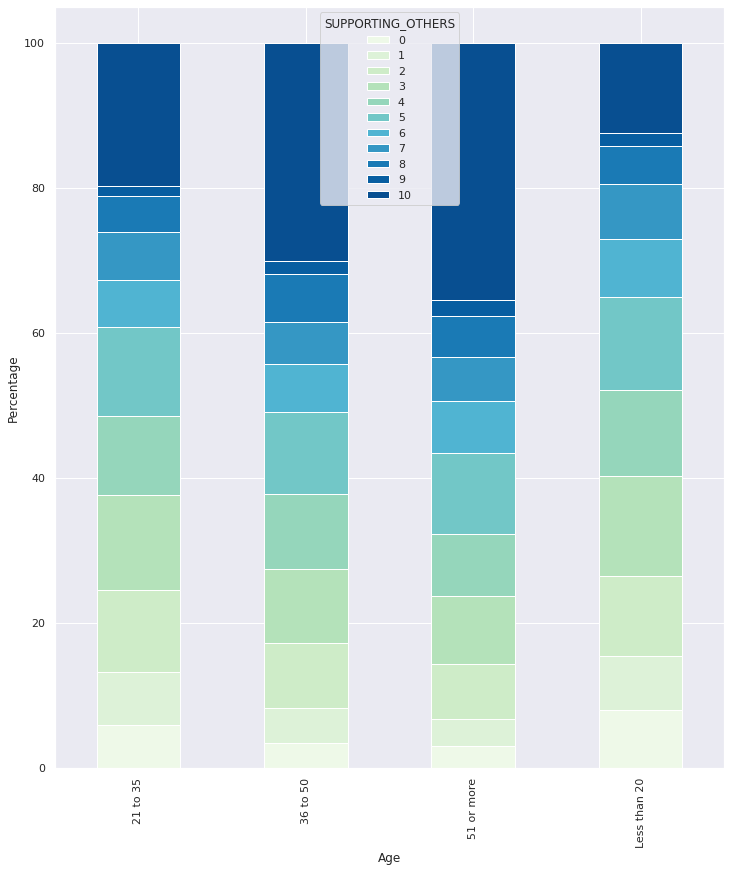

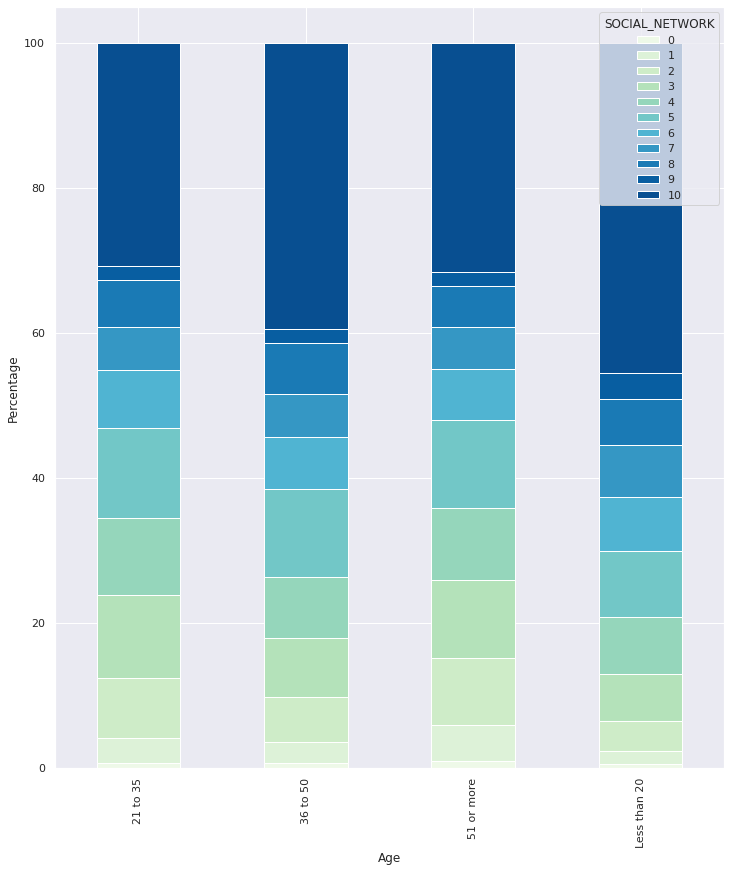

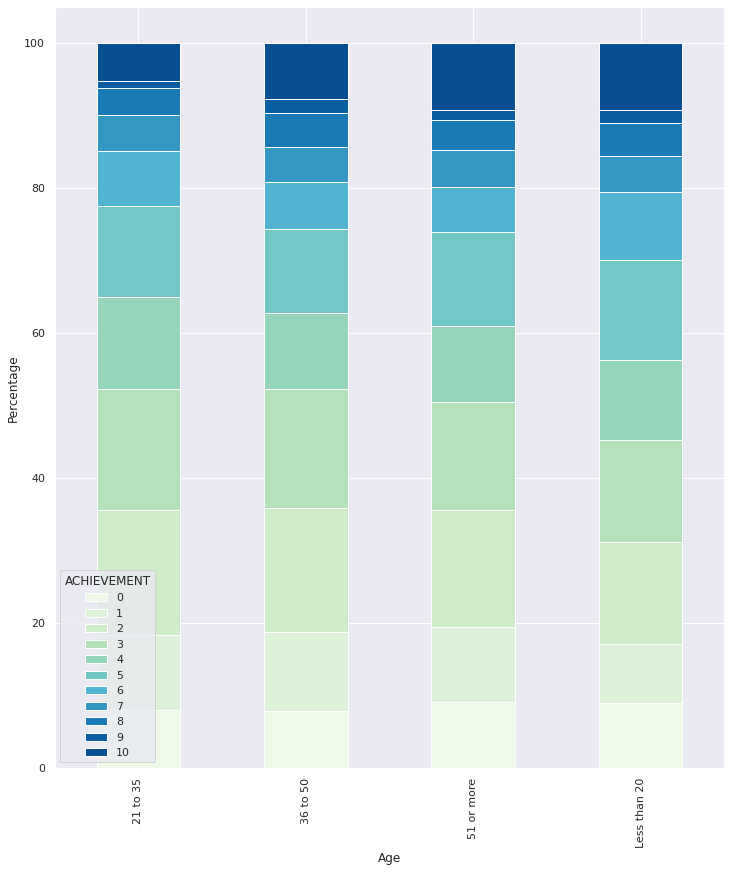

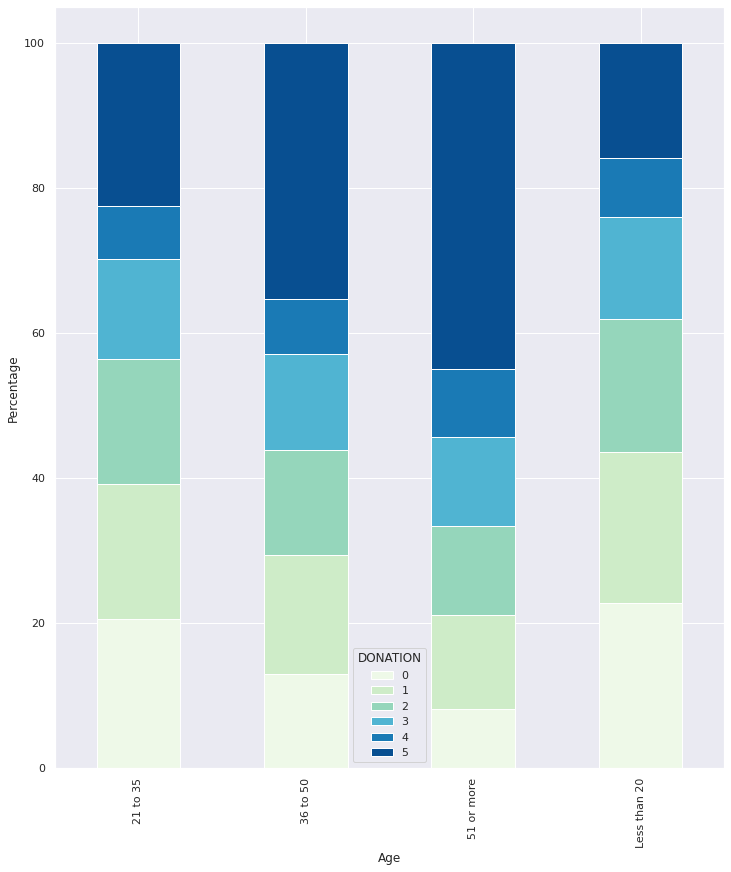

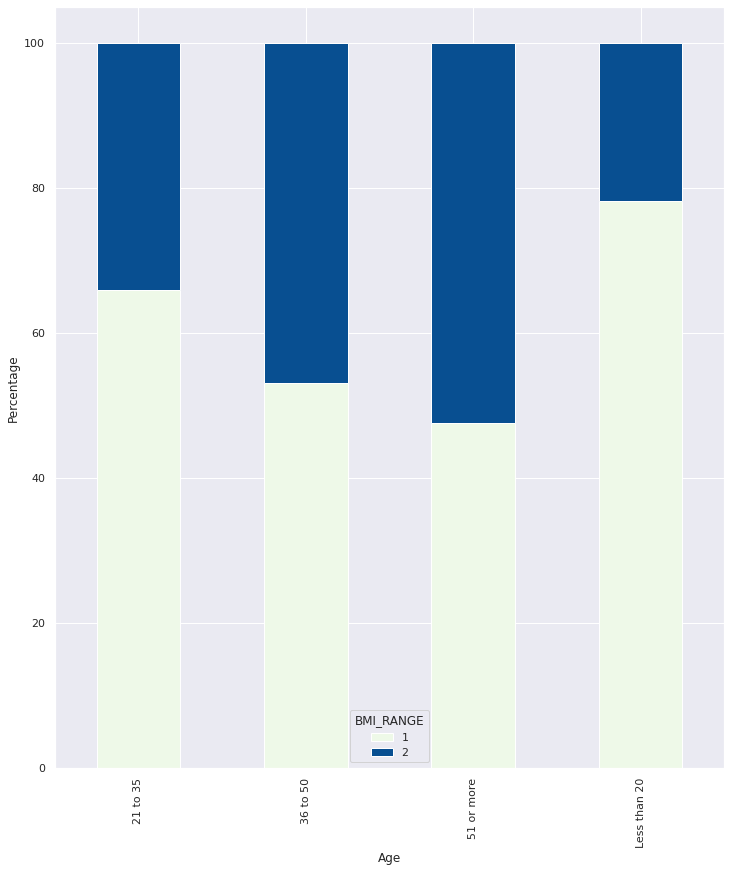

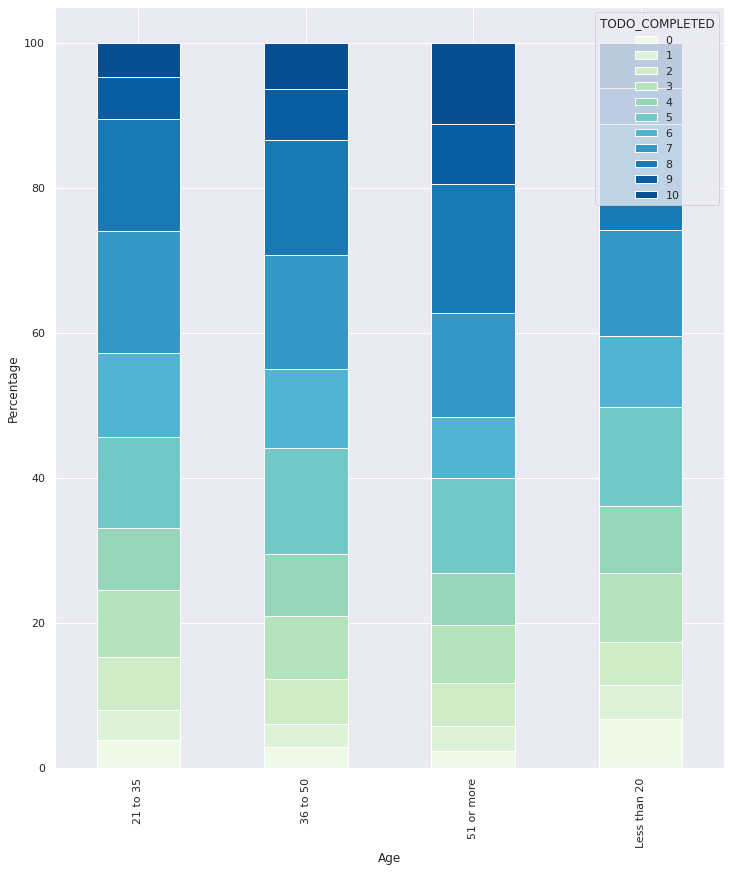

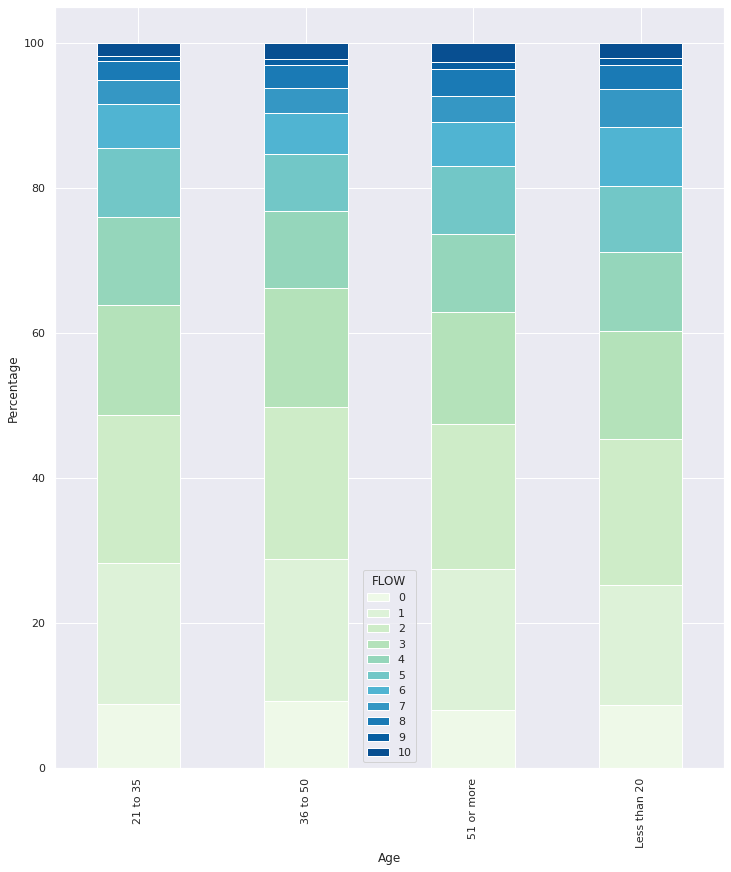

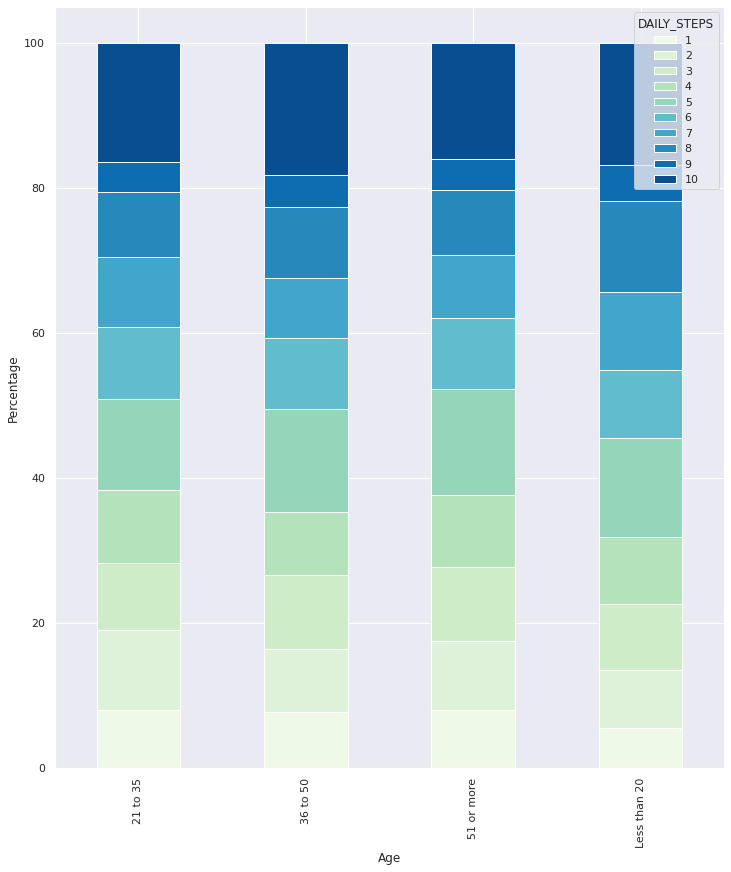

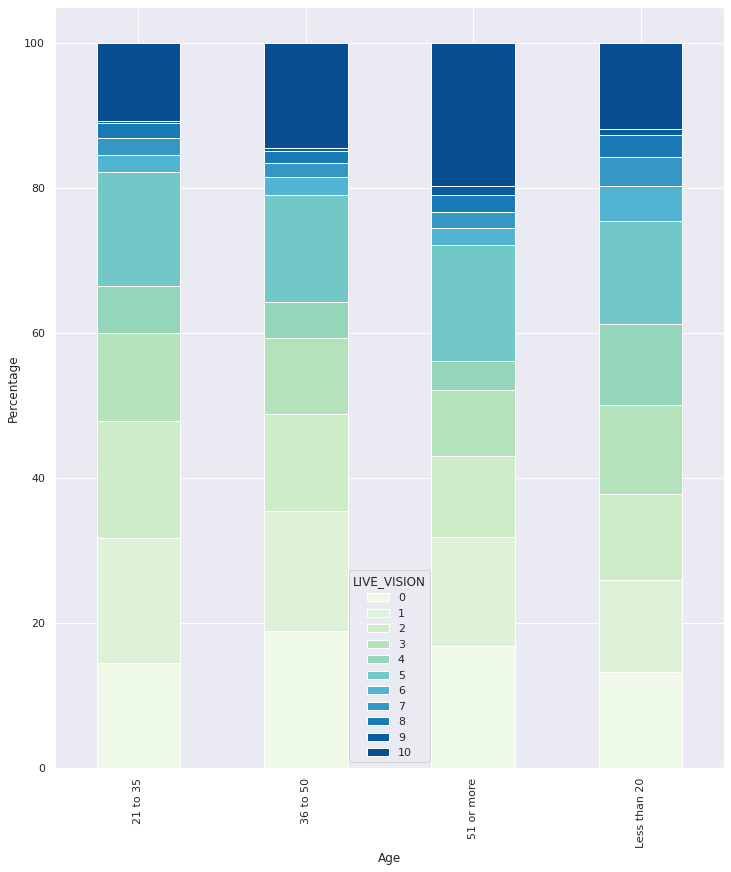

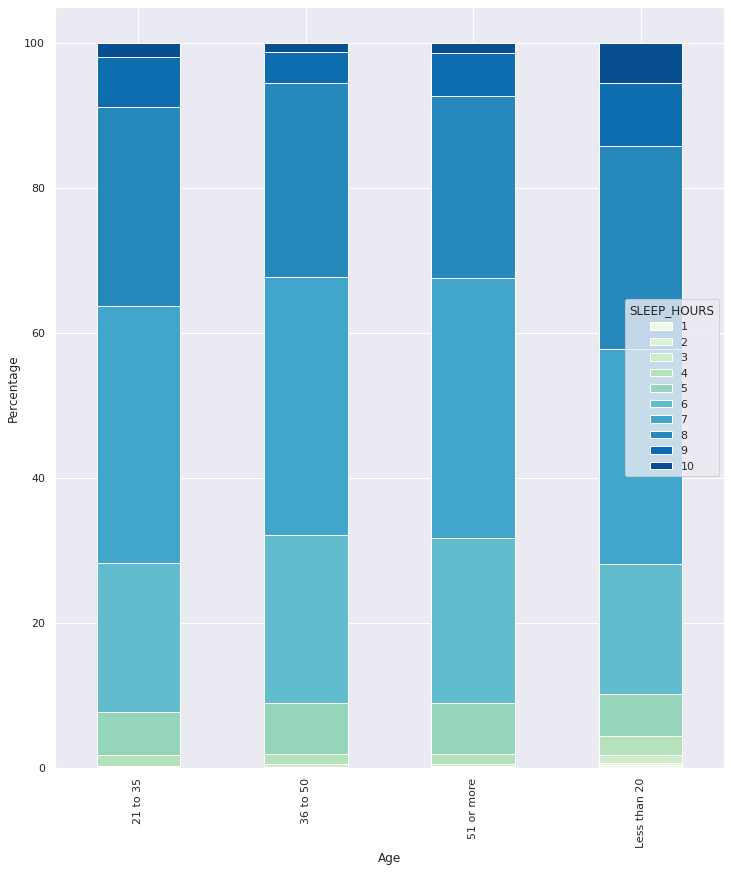

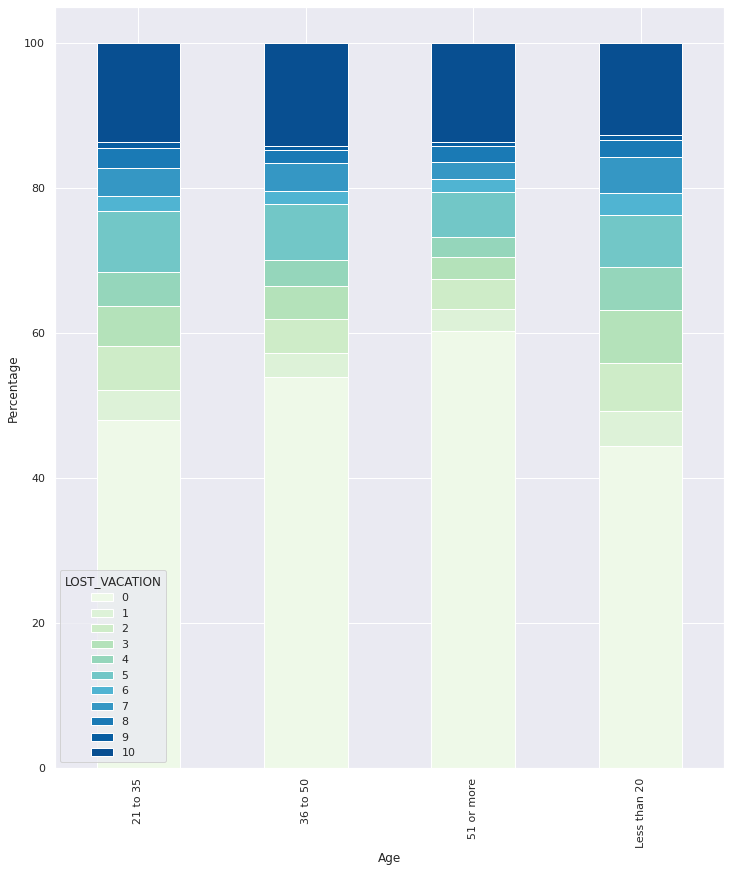

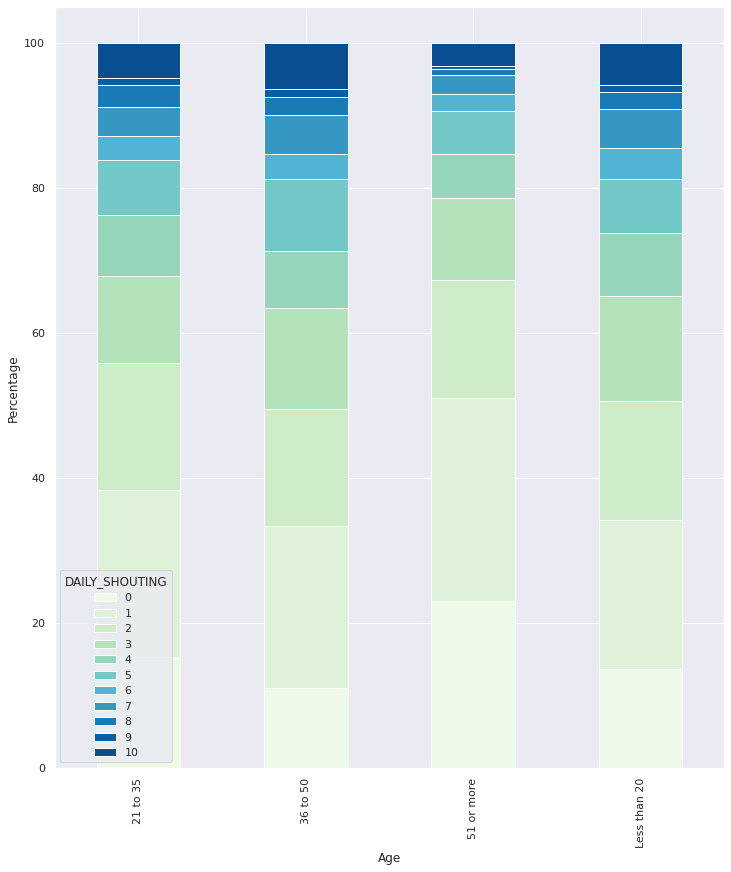

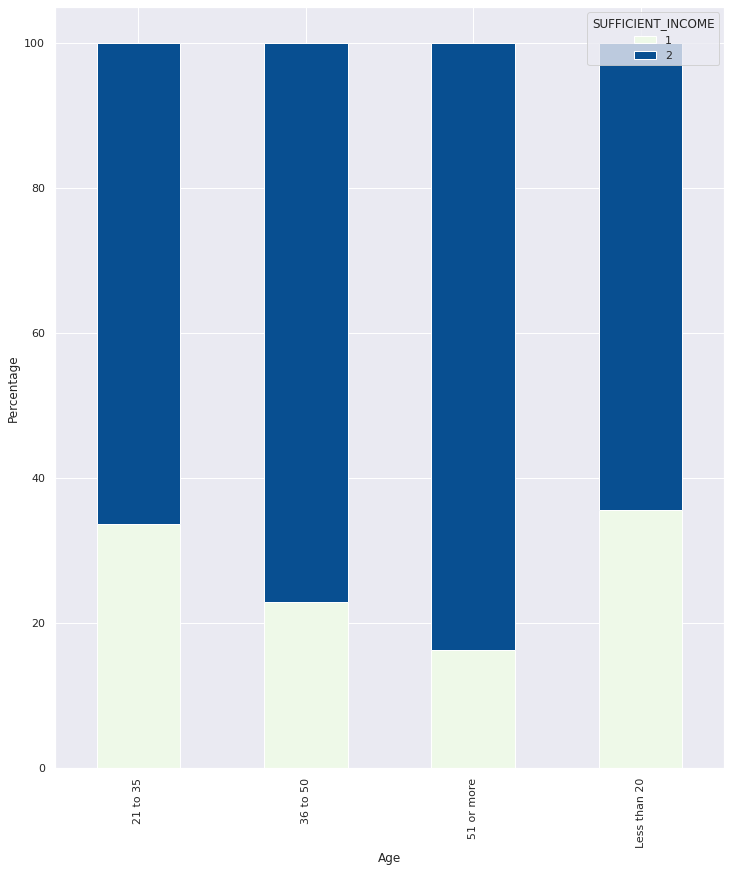

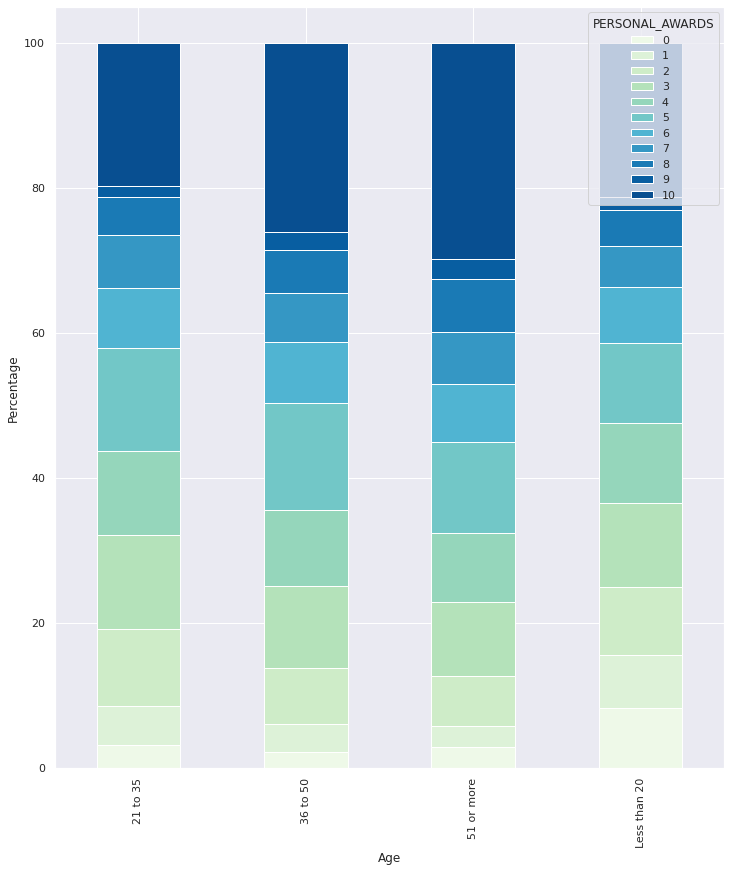

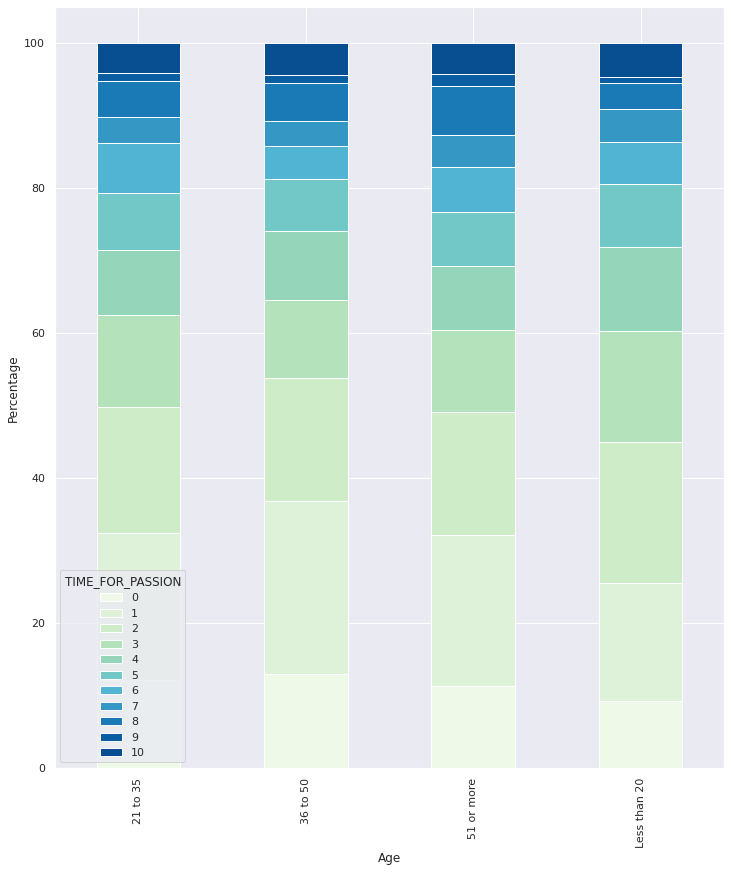

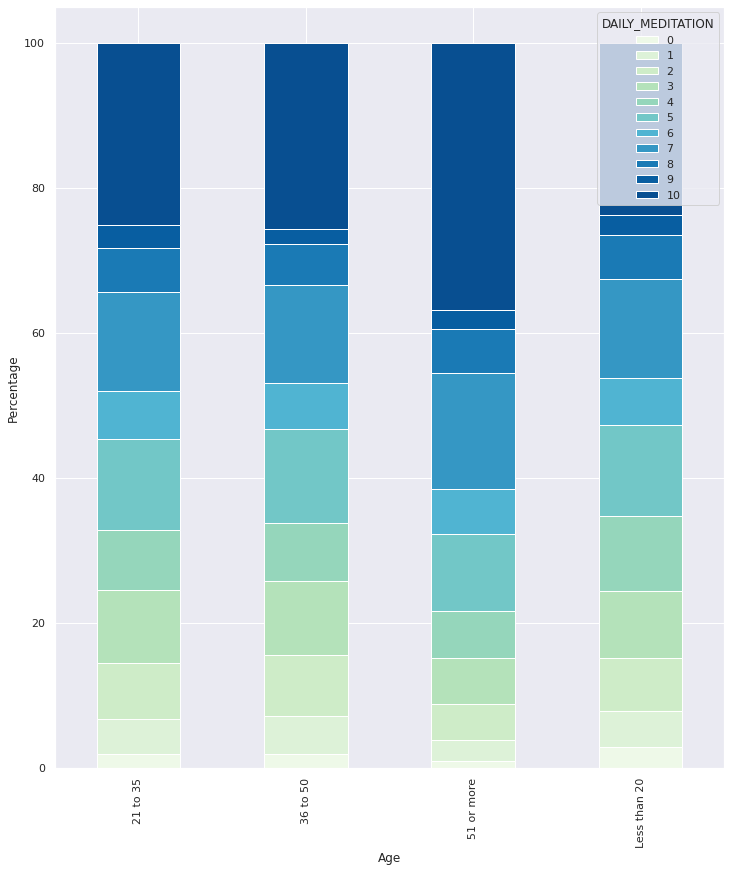

In [31]:
for df in (new):
    
    sns.set()
    fig=df.set_index(df.index).T.plot(kind='bar', stacked=True,colormap=ListedColormap(sns.color_palette("GnBu", 20)),figsize=(12,14))
    sns.set_style("whitegrid", {'axes.grid' : False})
    fig.set(xlabel='Age', ylabel='Percentage')
    fig
    name=str(df.index.name)+'.png'
    #plt.savefig(name, dpi=300, bbox_inches='tight')

People under 20 seems to have no worries but it doesn't last for long:   for the 5 level of stress people from 21 to 35 years are the most sressed.More precisely, our mor stressful year are our working years

# Women are more stressed

In [18]:
data_gender=pd.get_dummies(data['GENDER'])
data_gender=pd.concat([data['DAILY_STRESS'],data_gender],axis=1)

data_gender=data_gender.groupby('DAILY_STRESS').sum()

data_gender.index.name='index'
data_gender['DAILY_STRESS']=data_gender.index
summ=data_gender.sum(axis=0)
data_gender1=data_gender*100/summ
data_gender1['DAILY_STRESS']=data_gender.index
data_gender1



,Female,Male,DAILY_STRESS
index,,,
0,3.150117,6.328110,0
1,13.041224,19.658798,1
2,20.637801,21.940091,2
3,29.427016,25.094227,3
4,18.771066,17.298155,4
5,14.972777,9.680619,5


[Text(73.5, 0.5, 'Percentage')]

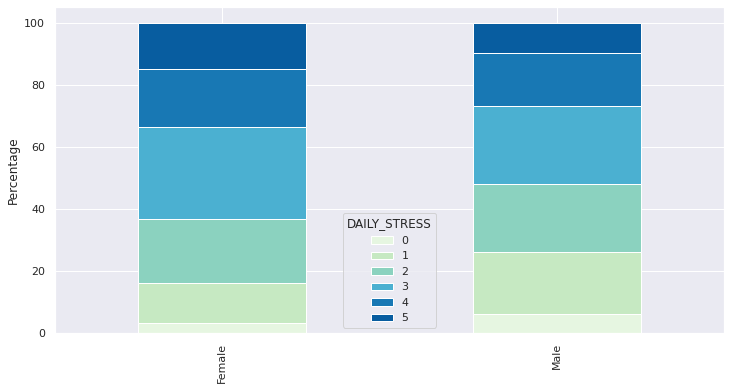

In [23]:
sns.set()
fig=data_gender1.set_index('DAILY_STRESS').T.plot(kind='bar', stacked=True,colormap=ListedColormap(sns.color_palette("GnBu", 10)), figsize=(12,6))
fig
plt.savefig('women_vs_men.png', dpi=300, bbox_inches='tight')

fig.set(ylabel='Percentage')

# Correlation

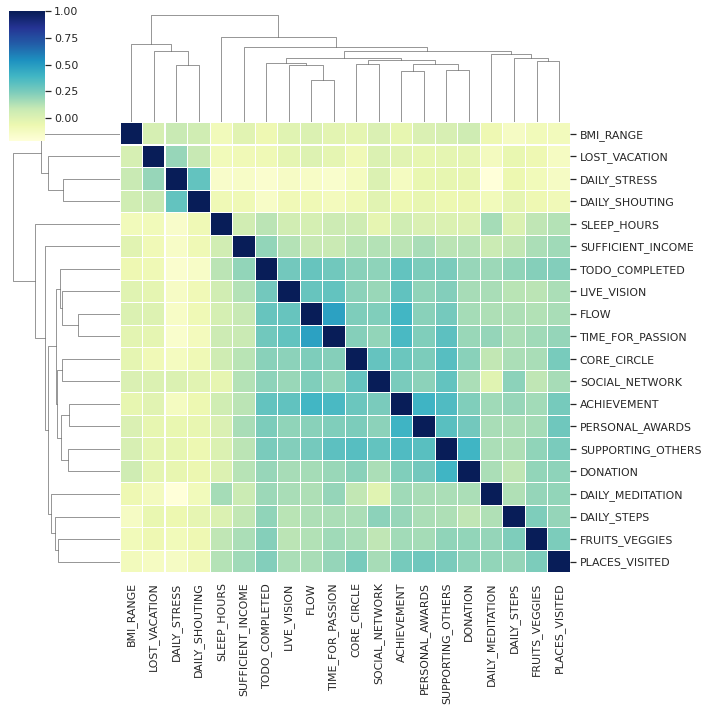

In [25]:
corrmat = data.corr() 
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1)
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
cg 
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

lin for the dataset in kaggle: https://www.kaggle.com/ydalat/lifestyle-and-wellbeing-data   
link for the survey:http://www.authentic-happiness.com/your-life-satisfaction-score